In [39]:
# %% [markdown]
# ## Importing Libraries

In [40]:
# %%
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import pickle
import warnings
import tkinter as tk
from tkinter import ttk, messagebox

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [41]:
# %%
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [42]:
# %% [markdown]
# ## Importing Data

In [43]:
# %%
data = pd.read_csv(r'water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [44]:
# %%
columns_name = data.columns
for index, col_name in enumerate(columns_name):
    print(index, col_name)

0 ph
1 Hardness
2 Solids
3 Chloramines
4 Sulfate
5 Conductivity
6 Organic_carbon
7 Trihalomethanes
8 Turbidity
9 Potability


In [45]:
# %%
# Function to detect outliers using Tukey's method
def detect_outliers_tukey(data, features):
    outliers = pd.DataFrame()
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        feature_outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        outliers = pd.concat([outliers, feature_outliers])
    return outliers

In [46]:
# List of features for outlier detection
features_for_outliers = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [47]:
# Detect and remove outliers from the entire dataset
outliers = detect_outliers_tukey(data, features_for_outliers)
data_no_outliers = data[~data.index.isin(outliers.index)]

In [48]:
# Display information about the removed outliers
print(colored(f"Removed {len(outliers)} outliers from the dataset.", 'blue'))

Removed 366 outliers from the dataset.


In [49]:
# Data after removing outliers
data_no_outliers.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [50]:
# %% [markdown]
# ### Data Informatics

In [51]:
# %%
data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2951 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2500 non-null   float64
 1   Hardness         2951 non-null   float64
 2   Solids           2951 non-null   float64
 3   Chloramines      2951 non-null   float64
 4   Sulfate          2247 non-null   float64
 5   Conductivity     2951 non-null   float64
 6   Organic_carbon   2951 non-null   float64
 7   Trihalomethanes  2804 non-null   float64
 8   Turbidity        2951 non-null   float64
 9   Potability       2951 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 253.6 KB


In [52]:
# %%
data_no_outliers.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)

,min,50%,mean,max,std
ph,3.148712,7.035894,7.073836,10.947473,1.443743
Hardness,117.791230,197.191839,196.509523,275.886513,29.295255
Solids,320.942611,20743.348400,21597.987516,44652.363870,8080.717798
Chloramines,3.181183,7.121477,7.118711,11.086526,1.437921
Sulfate,229.575561,333.289216,334.105192,437.647162,37.901251
Conductivity,201.619737,421.183478,425.545964,652.537592,80.117872
Organic_carbon,5.362371,14.243374,14.317080,23.234326,3.206064
Trihalomethanes,23.792950,66.300896,66.419854,108.849568,15.573778
Turbidity,1.872573,3.954964,3.969211,6.083772,0.760715
Potability,0.000000,0.000000,0.381904,1.000000,0.485936


In [53]:
# %%
columns_name = data_no_outliers.columns
for index, col_name in enumerate(columns_name):
    print(index, col_name)

0 ph
1 Hardness
2 Solids
3 Chloramines
4 Sulfate
5 Conductivity
6 Organic_carbon
7 Trihalomethanes
8 Turbidity
9 Potability


In [54]:
# %%
data_no_outliers.isnull().sum()

ph                 451
Hardness             0
Solids               0
Chloramines          0
Sulfate            704
Conductivity         0
Organic_carbon       0
Trihalomethanes    147
Turbidity            0
Potability           0
dtype: int64

In [55]:
# %%
data_no_outliers.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
10,7.360640,165.520797,32452.61441,7.550701,326.624353,425.383420,15.586810,78.740016,3.662292,0


In [56]:
# %% [markdown]
# # Cleaning the dataset

In [57]:
# %% [markdown]
# ## Modifying columns which contain null values and Inserting mean in place of the null values

In [58]:
# %%
data_no_outliers['ph'].fillna(value=data_no_outliers['ph'].mean(), inplace=True)
data_no_outliers['Sulfate'].fillna(value=data_no_outliers['Sulfate'].mean(), inplace=True)
data_no_outliers['Trihalomethanes'].fillna(value=data_no_outliers['Trihalomethanes'].mean(), inplace=True)

In [59]:
# %%
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [60]:
# %%
X=data_no_outliers.iloc[:,0:9]
Y=data_no_outliers.iloc[:,-1]

In [61]:
# %%
X.shape , Y.shape

((2951, 9), (2951,))

In [62]:
# %% [markdown]
# ## Splitting the dataset in training and testing data

In [63]:
# %%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [64]:
# %%
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-6.68516115e-16,  2.86133454e-01, -9.98432649e-02, ...,
        -1.22828616e+00,  1.35530470e+00, -1.32276284e+00],
       [-2.52732308e+00, -2.29040411e+00, -3.67347645e-01, ...,
         2.69202057e-01, -6.64819454e-01,  6.98731714e-01],
       [ 7.71716343e-01,  9.46618661e-01, -2.08982912e-01, ...,
         7.95988114e-01,  1.57164287e-05, -1.20075383e+00],
       ...,
       [ 1.76554752e+00, -7.08319255e-01,  1.43051023e+00, ...,
        -1.02261395e+00,  2.25688238e-01, -8.81340012e-01],
       [-1.46552717e+00,  1.16401145e+00, -1.18996205e+00, ...,
        -9.82097435e-01,  7.29226300e-01,  9.72207867e-01],
       [ 6.02774685e-01, -4.80440696e-02, -5.19077799e-01, ...,
         5.68795941e-01,  8.08961145e-01, -2.18260793e+00]])

In [65]:
# %% [markdown]
# ## 4. Random Forest Classifier

In [66]:
# %%
# Creating model object
model_rf = RandomForestClassifier(random_state=42)

In [67]:
# Training model object
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
# %%
#Making Predictions
pred_rf = model_rf.predict(X_test)

In [69]:
#accuracy score
rf_accuracy = accuracy_score(y_test, pred_rf)
print(rf_accuracy)

0.6478439425051334


In [70]:
# %%
#classifiction report
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       602
           1       0.59      0.26      0.36       372

    accuracy                           0.65       974
   macro avg       0.62      0.57      0.56       974
weighted avg       0.63      0.65      0.61       974



<Axes: >

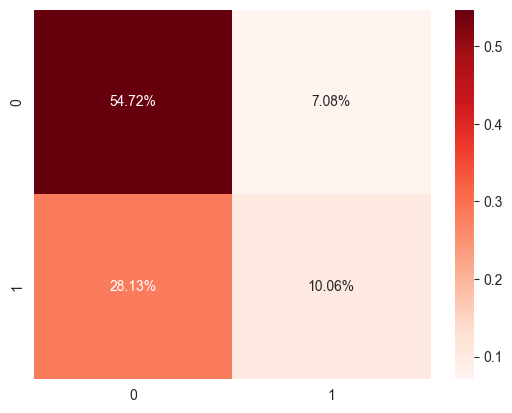

In [71]:
# confusion Maxtrix
cm4 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [72]:
# %% [markdown]
# The shows that 'Sulfates' Contribute most to the result followed by pph, hardness
# and we can work on it to make the model more accurate.

In [73]:
# %% [markdown]
# Now, Lets go ahead and make predictions to see how the model performs

In [74]:
# %% [markdown]
# ## Lets try it!

In [75]:
# %%
pickle.dump(model_rf,open("model.pkl","wb"))

In [76]:
model=pickle.load(open('model.pkl','rb'))